<a href="https://colab.research.google.com/github/DhruvAgg10/Python-projects/blob/main/housingprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
#check housing prices using linear regression , xgboost and neural networkd
from sklearn.linear_model import LinearRegression
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import plot_importance

importing boston housing prices dataset

In [8]:
house_price= pd.read_csv('/content/Boston House Price Data.csv')

In [9]:
house_price.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
#check where are null values and remove them
print(house_price.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


In [12]:
#understand relation between variables in dataset
# positive correlation is when one var varies directly with other var
#- negative correaltion is when one var varies inversely with othrr variable
correlation = house_price.corr()

<Axes: >

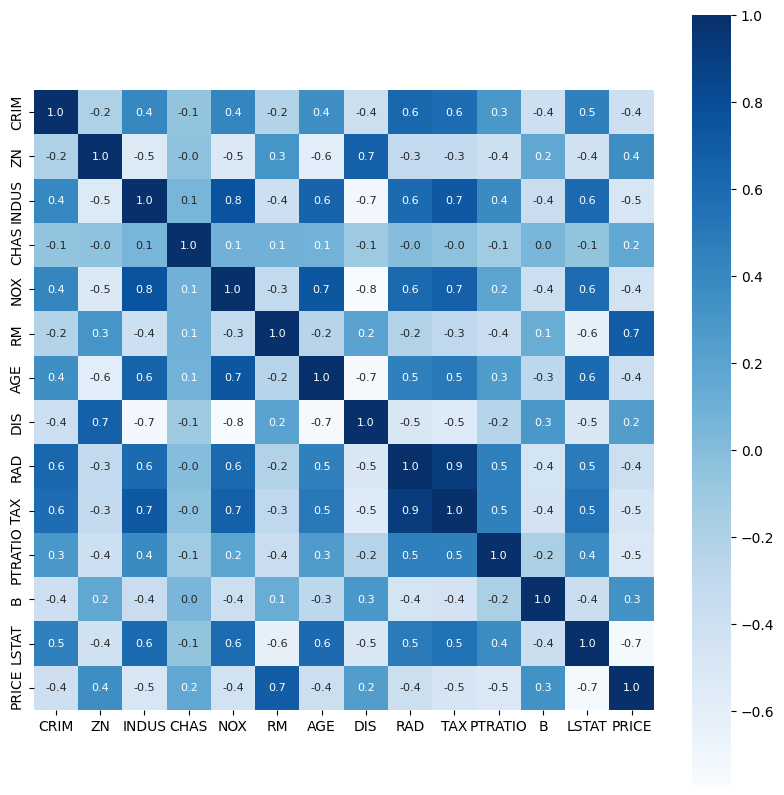

In [13]:
#draw a heatmap to see the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
#square- True: makes cell square shaped for better align
#fmt=.1f :Formats correlation values with 1 decimal place
#annot=True	Annotates (displays) the correlation values inside the heatmap cells.
#annot_kws={'size':8}	Adjusts annotation text size to 8 (makes text smaller or larger).
#cmap='Blues'	Uses the Blues color map for visualization. Darker blue means higher correlation.

In [14]:
#split the data and the prices
X= house_price.iloc[:,:-1]
Y= house_price.iloc[:,-1]

In [22]:

#split data into train and test
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.4, random_state=2)

model training using xg boost

In [66]:
# Initialize XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=150, learning_rate=0.07, max_depth=4,
    reg_lambda=2.5,  # L2 Regularization to prevent overfitting
    reg_alpha=1.5,    # L1 Regularization
    random_state=42
)
#n_estimators=100 (Number of Trees)
#Defines the number of boosting rounds (trees).
#Higher values increase accuracy but may lead to overfitting if too high
#learning_rate=0.1 (Step Size per Tree)
#Controls how much each tree contributes to the model.
#Lower values make learning slower but can improve accuracy.
# max_depth=3 (Tree Depth)
#Controls how deep each tree can grow.
#Deeper trees capture more patterns but increase complexity and overfitting.
#random_state=42 (Reproducibility)
#Sets a fixed seed so that results are the same every time you train the model.
#Does not affect model performance but ensures consistency in results.
# Train the model
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [69]:
Y_pred= xgb_model.predict(X_train)
mse = mean_squared_error(Y_train, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.9726098063990061


In [70]:
# Calculate R-squared (R2)
r2 = r2_score(Y_train, Y_pred)
print("R-squared:", r2)

R-squared: 0.9867814573433245


In [71]:
Y_pred= xgb_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)
#mse coming 8. in test and 0.05 in train means model is overfitting

Mean Squared Error: 8.362220693066254


In [72]:
# Calculate R-squared (R2)
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)

R-squared: 0.9160033738635582


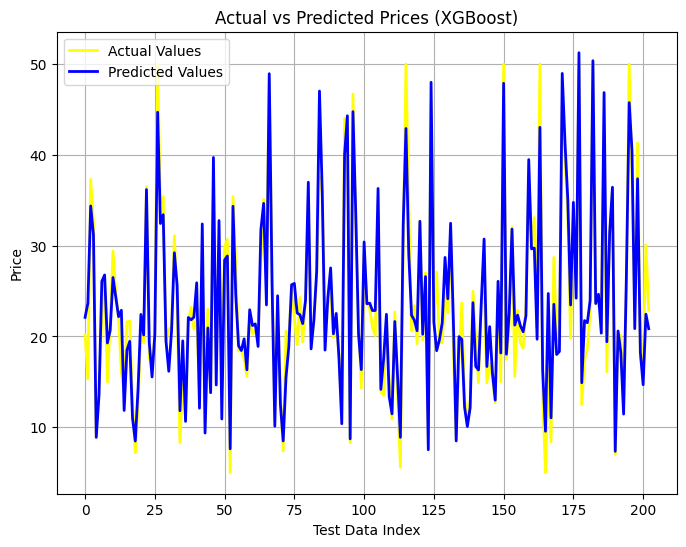

In [55]:
# Sort test data indices for better visualization
sorted_indices = np.argsort(range(len(Y_test)))

# Plot actual values (Yellow Line)
plt.figure(figsize=(8, 6))
plt.plot(np.array(Y_test)[sorted_indices], color='yellow', label='Actual Values', linewidth=2)

# Plot predicted values (Blue Line)
plt.plot(np.array(Y_pred)[sorted_indices], color='blue', label='Predicted Values', linewidth=2)

# Labels and title
plt.xlabel("Test Data Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices (XGBoost)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

model training using linear regression


In [75]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [80]:
predicted_prices = lin_reg.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)

R-squared: 0.9160033738635582


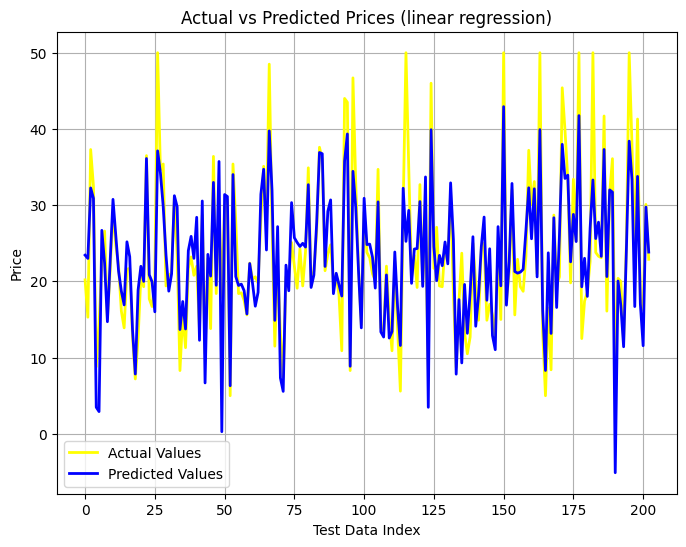

In [83]:
# Sort test data indices for better visualization
sorted_indices = np.argsort(range(len(Y_test)))

# Plot actual values (Yellow Line)
plt.figure(figsize=(8, 6))
plt.plot(np.array(Y_test)[sorted_indices], color='yellow', label='Actual Values', linewidth=2)

# Plot predicted values (Blue Line)
plt.plot(np.array(predicted_prices)[sorted_indices], color='blue', label='Predicted Values', linewidth=2)

# Labels and title
plt.xlabel("Test Data Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices (linear regression)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

now predicting using neural network

In [84]:
# Scale features for better neural network performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
from sklearn.neural_network import MLPRegressor

# Define the neural network model
mlp_model = MLPRegressor(hidden_layer_sizes=(128, 64, 32),  # Three hidden layers
                         activation='relu',  # ReLU activation function
                         solver='adam',  # Adam optimizer
                         alpha=0.01,  # L2 regularization
                         learning_rate='adaptive',
                         max_iter=1000,  # More iterations for convergence
                         random_state=42)

# Train the model
mlp_model.fit(X_train_scaled, Y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(128, 64, 32),
             learning_rate='adaptive', max_iter=1000, random_state=42)

In [88]:
# Predict on test data
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate performance
mse_mlp = mean_squared_error(Y_test, y_pred_mlp)
r2_mlp = r2_score(Y_test, y_pred_mlp)

print(f"Neural Network MSE: {mse_mlp:.4f}")
print(f"Neural Network R²: {r2_mlp:.4f}")


Neural Network MSE: 12.0676
Neural Network R²: 0.8788


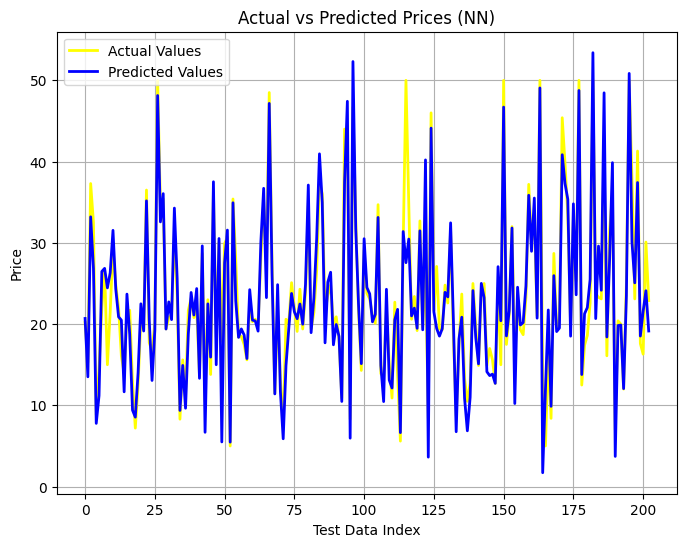

In [89]:
# Sort test data indices for better visualization
sorted_indices = np.argsort(range(len(Y_test)))

# Plot actual values (Yellow Line)
plt.figure(figsize=(8, 6))
plt.plot(np.array(Y_test)[sorted_indices], color='yellow', label='Actual Values', linewidth=2)

# Plot predicted values (Blue Line)
plt.plot(np.array(y_pred_mlp)[sorted_indices], color='blue', label='Predicted Values', linewidth=2)

# Labels and title
plt.xlabel("Test Data Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices (NN)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

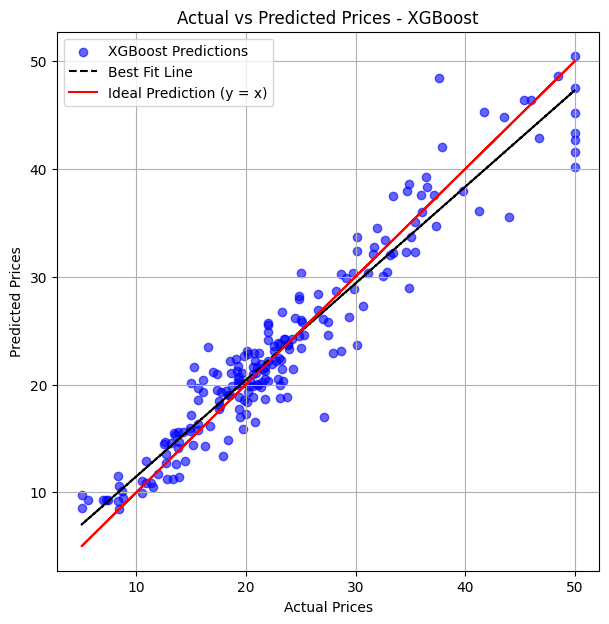

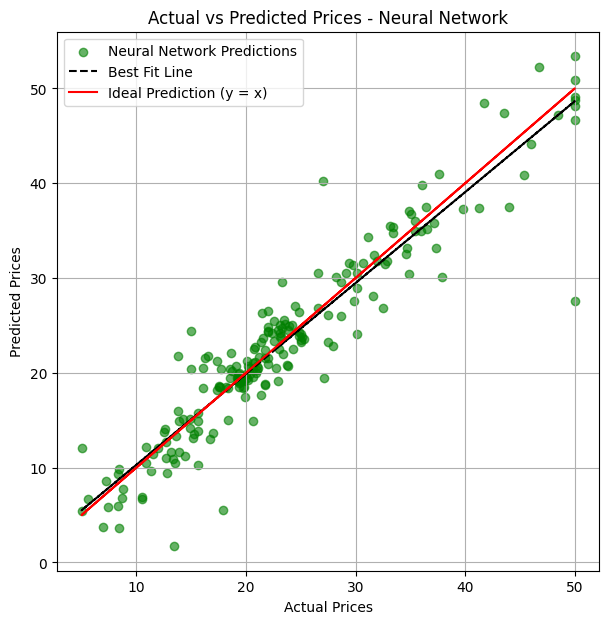

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Scatter Plot Function for Actual vs Predicted
def plot_scatter_slope(y_actual, y_pred, model_name, color):
    plt.figure(figsize=(7, 7))

    # Scatter plot
    plt.scatter(y_actual, y_pred, color=color, alpha=0.6, label=f"{model_name} Predictions")

    # Best-Fit Line (y = mx + c)
    m, b = np.polyfit(y_actual, y_pred, 1)  # Linear regression fit
    plt.plot(y_actual, m*y_actual + b, color="black", linestyle="--", label="Best Fit Line")

    # Plot the ideal y=x line (Perfect Predictions)
    plt.plot(y_actual, y_actual, color="red", linestyle="-", label="Ideal Prediction (y = x)")

    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"Actual vs Predicted Prices - {model_name}")
    plt.legend()
    plt.grid()
    plt.show()

# Plot for XGBoost
plot_scatter_slope(Y_test, Y_pred, "XGBoost", "blue")

# Plot for Neural Network
plot_scatter_slope(Y_test, y_pred_mlp, "Neural Network", "green")
